In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#读取数据
df = pd.read_excel('D.xlsx')
df  # data frame
df.head()
print(df)


      GPA   奖学金        学历  论文数量  项目  offer
0    4.00  8000    master     3   2      1
1    2.91     0  bachelor     0   0      1
2    3.11  1200  bachelor     1   3      1
3    4.90  8000  bachelor     4   1      1
4    3.01  1200  bachelor     1   0      1
..    ...   ...       ...   ...  ..    ...
108  2.50  8000    master     2   2      1
109  1.40  8000    master     2   0      1
110  3.50  8000    master     1   4      1
111  3.20  8000    master     4   2      1
112  3.50  8000    master     1   0      0

[113 rows x 6 columns]


In [4]:

df_学历 = df['学历'].str.get_dummies().add_prefix('学历: ')
df = pd.concat([df, df_学历], axis=1)
df.drop(columns='学历')
df


,GPA,奖学金,学历,论文数量,项目,offer,学历: bachelor,学历: master
0,4.00,8000,master,3,2,1,0,1
1,2.91,0,bachelor,0,0,1,1,0
2,3.11,1200,bachelor,1,3,1,1,0
3,4.90,8000,bachelor,4,1,1,1,0
4,3.01,1200,bachelor,1,0,1,1,0
...,...,...,...,...,...,...,...,...
108,2.50,8000,master,2,2,1,0,1
109,1.40,8000,master,2,0,1,0,1
110,3.50,8000,master,1,4,1,0,1
111,3.20,8000,master,4,2,1,0,1


/home/jht/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22870 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jht/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jht/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jht/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35770 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jht/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jht/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarni

Text(0.5, 1, 'offer')

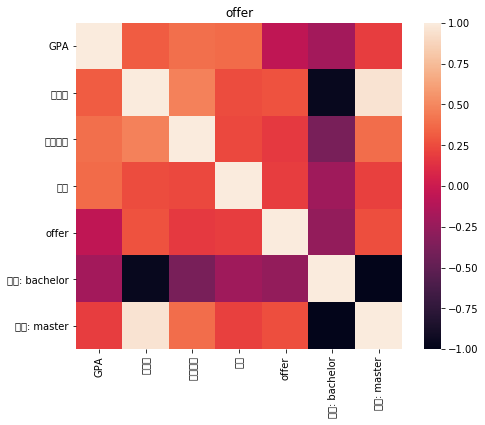

In [5]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, square=True)
plt.title('offer')

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
d=[(input('请输入您的GPA,项目，奖学金'))]
d1=[list(d)]
# d=d.reshape(-1,1)
X = df[['GPA', '项目','奖学金']].values
y = df['offer'].values.reshape(-1,1)
# X_normalizer = StandardScaler() # N(0,1)
# X_train = X_normalizer.fit_transform(X_train)
# X_test = X_normalizer.transform(X_test)
# print(X[:, 0])
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# k1=clf.kneighbors(x1,return_distance=False)
print(clf.predict(d))

请输入您的GPA,项目，奖学金[3.1,3,8000]


/home/jht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


ValueError: Expected 2D array, got 1D array instead:
array=['[3.1,3,8000]'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.figure(figsize =(16,14),dpi=144)
plt.scatter(X[:,0],X[:,1],X[:,2])

In [164]:
# 计算准确率
from sklearn.metrics import accuracy_score
correct = np.count_nonzero((clf.predict(X_test)==y_test)==True)
#accuracy_score(y_test, clf.predict(X_test))
print ("Accuracy is: %.3f" %(correct/len(X_test)))


Accuracy is: 17.862


(200, 2) (200,)


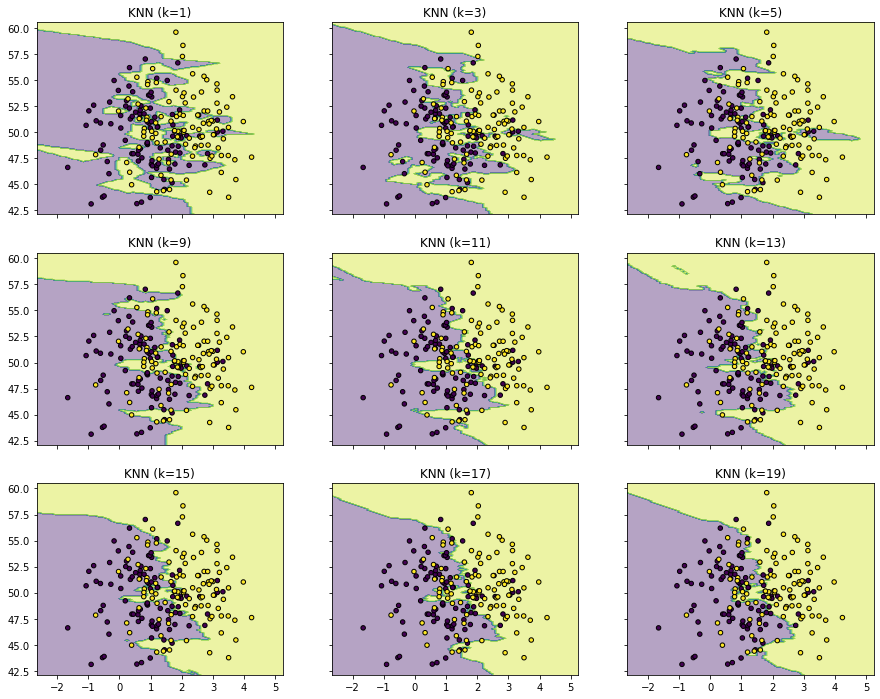

In [167]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

# 生成一些随机样本
n_points = 100
X1 = np.random.multivariate_normal([1,50], [[1,0],[0,10]], n_points)
X2 = np.random.multivariate_normal([2,50], [[1,0],[0,10]], n_points)
X = np.concatenate([X1,X2])
y = np.array([0]*n_points + [1]*n_points)
print (X.shape, y.shape)
# KNN模型的训练过程
clfs = []
neighbors = [1,3,5,9,11,13,15,17,19]
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))
# 可视化结果
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15, 12))
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]),
                        clfs,
                        ['KNN (k=%d)'%k for k in neighbors]):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()